## Review ablation surfaces for 2015 team paper

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#pd.describe_option('display')
pd.set_option('display.max_rows', 370)
pd.set_option('display.max_columns', 70)
pd.set_option('display.width', 200)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
os.chdir( "/Users/brodzik/ipython_notebooks/charis/dehra_dun" )
!pwd

/Users/brodzik/ipython_notebooks/charis/dehra_dun


In [3]:
def get_surface_type( yyyy, surface_class, surface_type ):
    import glob
    list = glob.glob( "/Users/brodzik/projects/CHARIS/pdd_melt_model/2015_paper/*" + yyyy + "*" + surface_class + "*" + surface_type + ".dat")
    list.sort()
    from imp import reload
    import hypsometry
    reload(hypsometry)
    import re
    searchRegex = re.compile('(' + surface_class + '.\d{4})').search
    labels = [ ( m.group(1) ) for l in list for m in (searchRegex(l),) if m]
    
    # Read the first file to get the dates
    area = hypsometry.Hypsometry()
    area.read( list[0], verbose=True )
    df = pd.DataFrame(index=area.data.index)
    
    # Read each file in turn and total by doy
    for label,file in zip(labels,list):
        area.read( file, verbose=False )
        df[ label ] = area.data_by_doy()
    
    print "Done for " + yyyy + ", " + surface_class + ", " + surface_type
    return( df )

In [4]:
def get_surfaces( yyyy, surface_type):
    grsize_scag = get_surface_type( yyyy, 'GRSIZE_SCAG', surface_type )
    grsize_drfs = get_surface_type( yyyy, 'GRSIZE_DRFS',  surface_type )
    albedo_mcd = get_surface_type( yyyy, 'ALBEDO_MCD',  surface_type )
    albedo_mod10a1 = get_surface_type( yyyy, 'ALBEDO_MOD10A1',  surface_type )
    return ( grsize_scag, grsize_drfs, albedo_mcd, albedo_mod10a1 )

In [5]:
def display_surfaces( grsize_scag, grsize_drfs, albedo_mcd, albedo_mod10a1, yyyy, surface_type):
    title = surface_type + ', ' + yyyy
    fig, axes = plt.subplots(4, 1, figsize=(12,12) )
    albedo_mcd.plot( title=title, ax=axes[0] ).legend(bbox_to_anchor=(1.3,1.0))
    albedo_mod10a1.plot( title=title, ax=axes[1] ).legend(bbox_to_anchor=(1.3,1.0))
    grsize_drfs.plot( title=title, ax=axes[2] ).legend(bbox_to_anchor=(1.3,1.0))
    grsize_scag.plot( title=title, ax=axes[3] ).legend(bbox_to_anchor=(1.3,1.0))

In [6]:
def first_and_last_column( df ):
    return (df[[df.columns[0],df.columns[df.columns.size-1]]])

In [7]:
(gscag_ablation_01, gdrfs_ablation_01, amcd_ablation_01, amod10_ablation_01 ) = get_surfaces( '2001', 'ablation_area' )
(gscag_on_ice_01, gdrfs_on_ice_01, amcd_on_ice_01, amod10_on_ice_01 ) = get_surfaces( '2001', 'snow_on_ice_area' )
(gscag_off_ice_01, gdrfs_off_ice_01, amcd_off_ice_01, amod10_off_ice_01 ) = get_surfaces( '2001', 'snow_off_ice_area' )

hypsometry: read hypsometry data from /Users/brodzik/projects/CHARIS/pdd_melt_model/2015_paper/IN_Hunza_at_Danyour.2001.0100m.GRSIZE_SCAG.0200.ablation_area.dat
hypsometry: 11 comments.
hypsometry: 365 dates.
hypsometry: 64 elevations.
Done for 2001, GRSIZE_SCAG, ablation_area
hypsometry: read hypsometry data from /Users/brodzik/projects/CHARIS/pdd_melt_model/2015_paper/IN_Hunza_at_Danyour.2001.0100m.GRSIZE_DRFS.0114.ablation_area.dat
hypsometry: 11 comments.
hypsometry: 365 dates.
hypsometry: 64 elevations.
Done for 2001, GRSIZE_DRFS, ablation_area
hypsometry: read hypsometry data from /Users/brodzik/projects/CHARIS/pdd_melt_model/2015_paper/IN_Hunza_at_Danyour.2001.0100m.ALBEDO_MCD.0030.ablation_area.dat
hypsometry: 11 comments.
hypsometry: 365 dates.
hypsometry: 64 elevations.
Done for 2001, ALBEDO_MCD, ablation_area
hypsometry: read hypsometry data from /Users/brodzik/projects/CHARIS/pdd_melt_model/2015_paper/IN_Hunza_at_Danyour.2001.0100m.ALBEDO_MOD10A1.0038.ablation_area.dat
hyps

In [8]:
(gscag_ablation_04, gdrfs_ablation_04, amcd_ablation_04, amod10_ablation_04 ) = get_surfaces( '2004', 'ablation_area' )
(gscag_on_ice_04, gdrfs_on_ice_04, amcd_on_ice_04, amod10_on_ice_04 ) = get_surfaces( '2004', 'snow_on_ice_area' )
(gscag_off_ice_04, gdrfs_off_ice_04, amcd_off_ice_04, amod10_off_ice_04 ) = get_surfaces( '2004', 'snow_off_ice_area' )

hypsometry: read hypsometry data from /Users/brodzik/projects/CHARIS/pdd_melt_model/2015_paper/IN_Hunza_at_Danyour.2004.0100m.GRSIZE_SCAG.0200.ablation_area.dat
hypsometry: 11 comments.
hypsometry: 366 dates.
hypsometry: 64 elevations.
Done for 2004, GRSIZE_SCAG, ablation_area
hypsometry: read hypsometry data from /Users/brodzik/projects/CHARIS/pdd_melt_model/2015_paper/IN_Hunza_at_Danyour.2004.0100m.GRSIZE_DRFS.0114.ablation_area.dat
hypsometry: 11 comments.
hypsometry: 366 dates.
hypsometry: 64 elevations.
Done for 2004, GRSIZE_DRFS, ablation_area
hypsometry: read hypsometry data from /Users/brodzik/projects/CHARIS/pdd_melt_model/2015_paper/IN_Hunza_at_Danyour.2004.0100m.ALBEDO_MCD.0030.ablation_area.dat
hypsometry: 11 comments.
hypsometry: 366 dates.
hypsometry: 64 elevations.
Done for 2004, ALBEDO_MCD, ablation_area
hypsometry: read hypsometry data from /Users/brodzik/projects/CHARIS/pdd_melt_model/2015_paper/IN_Hunza_at_Danyour.2004.0100m.ALBEDO_MOD10A1.0038.ablation_area.dat
hyps

In [9]:
#display_surfaces( gscag_ablation_01, gdrfs_ablation_01, amcd_ablation_01, amod10_ablation_01, '2001', 'Ablation Area')
#display_surfaces( gscag_on_ice_01, gdrfs_on_ice_01, amcd_on_ice_01, amod10_on_ice_01, '2001', 'Snow on Ice Area')
#display_surfaces( gscag_off_ice_01, gdrfs_off_ice_01, amcd_off_ice_01, amod10_ablation_01, '2001', 'Snow off Ice Area')

In [10]:
#display_surfaces( gscag_ablation_04, gdrfs_ablation_04, amcd_ablation_04, amod10_ablation_04, '2004', 'Ablation Area')
#display_surfaces( gscag_on_ice_04, gdrfs_on_ice_04, amcd_on_ice_04, amod10_on_ice_04, '2004', 'Snow on Ice Area')
#display_surfaces( gscag_off_ice_04, gdrfs_off_ice_04, amcd_off_ice_04, amod10_ablation_04, '2004', 'Snow off Ice Area')

In [11]:
#amcd_ablation_01[['ALBEDO_MCD.0030','ALBEDO_MCD.0047']]
#amcd_ablation_01.columns.size
#amcd_ablation_01[[amcd_ablation_01.columns[0],amcd_ablation_01.columns[amcd_ablation_01.columns.size-1]]]
#first_and_last_column(amcd_ablation_01)
#amcd_ablation_01[0:2]

In [12]:
def mult_display_surfaces( d1, d2, d3, d4, d5, d6, d7, d8, yyyy1, yyyy2, surface_type):
    title1 = surface_type + ', ' + yyyy1
    title2 = surface_type + ', ' + yyyy2
    fig, axes = plt.subplots(4, 2, figsize=(16,12) )
    d1.plot( title=title1, ax=axes[0,0], legend=False )
    d2.plot( title=title1, ax=axes[1,0], legend=False )
    d3.plot( title=title1, ax=axes[2,0], legend=False )
    d4.plot( title=title1, ax=axes[3,0], legend=False )
    d5.plot( title=title2, ax=axes[0,1] ).legend(bbox_to_anchor=(1.5,1.0))
    d6.plot( title=title2, ax=axes[1,1] ).legend(bbox_to_anchor=(1.5,1.0))
    d7.plot( title=title2, ax=axes[2,1] ).legend(bbox_to_anchor=(1.5,1.0))
    d8.plot( title=title2, ax=axes[3,1] ).legend(bbox_to_anchor=(1.5,1.0))

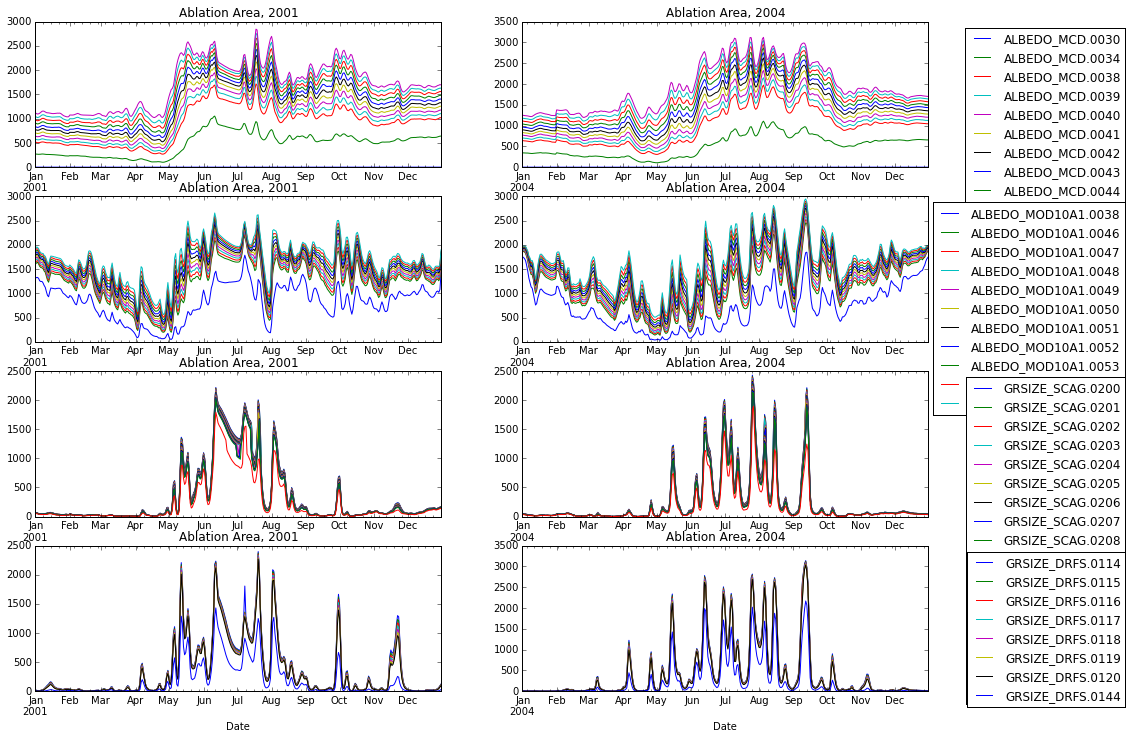

In [13]:
mult_display_surfaces( amcd_ablation_01, amod10_ablation_01, gscag_ablation_01, gdrfs_ablation_01, 
                       amcd_ablation_04, amod10_ablation_04, gscag_ablation_04, gdrfs_ablation_04, 
                      '2001', '2004', 'Ablation Area')

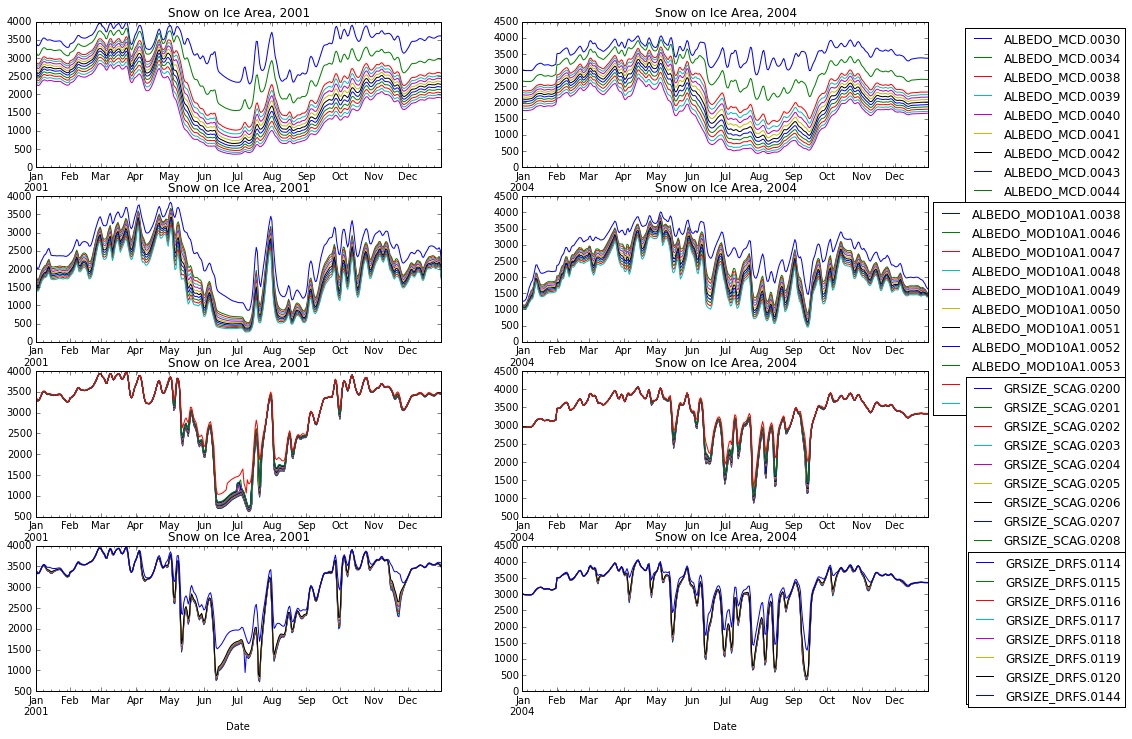

In [14]:
mult_display_surfaces( amcd_on_ice_01, amod10_on_ice_01, gscag_on_ice_01, gdrfs_on_ice_01,  
                      amcd_on_ice_04, amod10_on_ice_04, gscag_on_ice_04, gdrfs_on_ice_04, 
                      '2001', '2004', 'Snow on Ice Area')

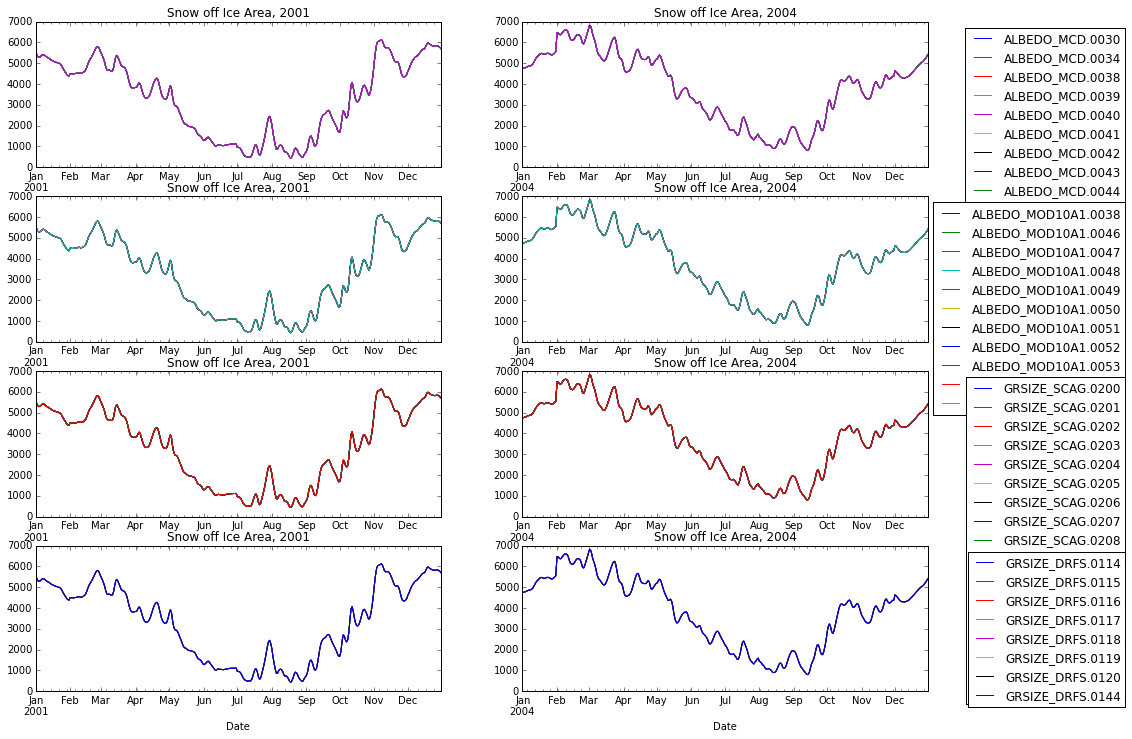

In [15]:
mult_display_surfaces( amcd_off_ice_01, amod10_off_ice_01, gscag_off_ice_01, gdrfs_off_ice_01,  
                       amcd_off_ice_04, amod10_off_ice_04, gscag_off_ice_04, gdrfs_off_ice_04, 
                      '2001', '2004', 'Snow off Ice Area')

<h3>Values when we expanded the threshold ranges:</h3>

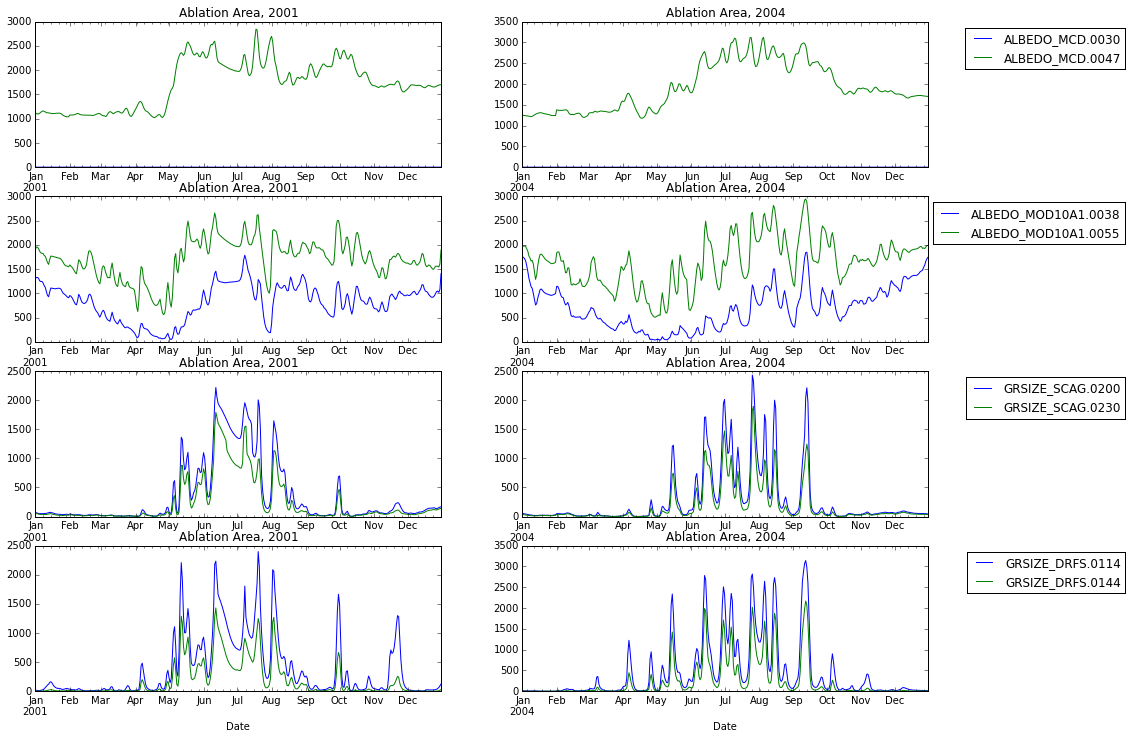

In [16]:
mult_display_surfaces( first_and_last_column(amcd_ablation_01), first_and_last_column(amod10_ablation_01), 
                      first_and_last_column(gscag_ablation_01), first_and_last_column(gdrfs_ablation_01), 
                      first_and_last_column(amcd_ablation_04), first_and_last_column(amod10_ablation_04), 
                      first_and_last_column(gscag_ablation_04), first_and_last_column(gdrfs_ablation_04),
                      '2001', '2004', 'Ablation Area')

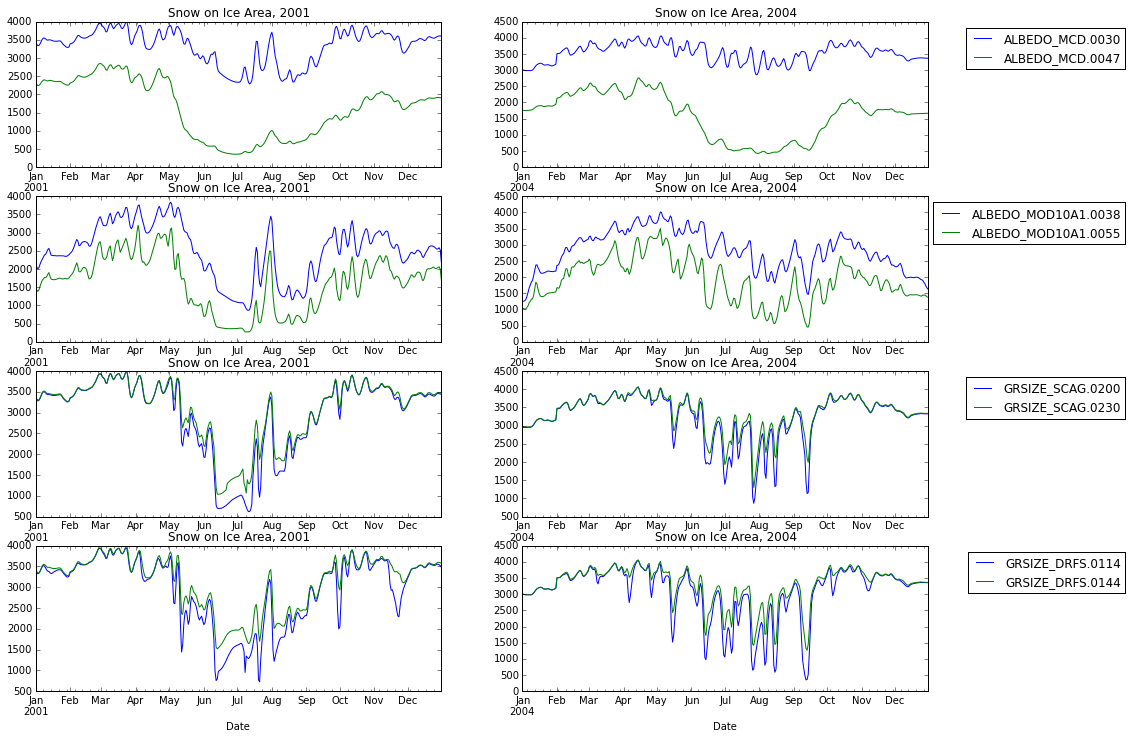

In [17]:
mult_display_surfaces( first_and_last_column(amcd_on_ice_01), first_and_last_column(amod10_on_ice_01), 
                       first_and_last_column(gscag_on_ice_01), first_and_last_column(gdrfs_on_ice_01),  
                       first_and_last_column(amcd_on_ice_04), first_and_last_column(amod10_on_ice_04), 
                       first_and_last_column(gscag_on_ice_04), first_and_last_column(gdrfs_on_ice_04), 
                      '2001', '2004', 'Snow on Ice Area')

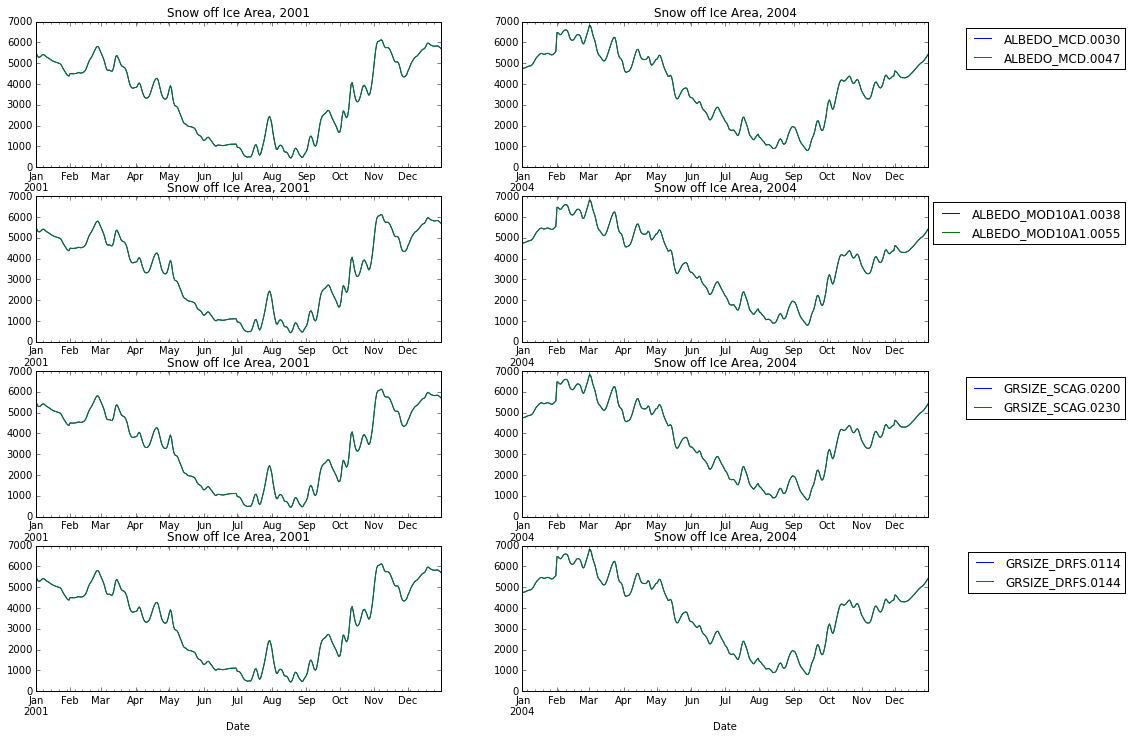

In [18]:
mult_display_surfaces( first_and_last_column(amcd_off_ice_01), first_and_last_column(amod10_off_ice_01), 
                      first_and_last_column(gscag_off_ice_01), first_and_last_column(gdrfs_off_ice_01),  
                       first_and_last_column(amcd_off_ice_04), first_and_last_column(amod10_off_ice_04), 
                      first_and_last_column(gscag_off_ice_04), first_and_last_column(gdrfs_off_ice_04), 
                      '2001', '2004', 'Snow off Ice Area')